In [6]:
# Creating a function that outputs the M matrix  
def M_matrix(Nx, alpha):
    """
    Creating the M matrix which is used to solve the matrix equation to find the rods temperature distribution at the next time step 

    Parameters:
    -----------
    - Nx: Number of spatial points on the rod 
    - alpha: Constant defined below that is used within the array 

    Returns:
    --------
    - M: Nx - 2 by Nx - 2 array, where the diagonals are filled with 1 + 2*alpha, the off diagonals are filled with - alpha, and the rest of the values are 0  
    """
    
    # Constructing the matrix M 
    M = np.diag(1 + 2 * alpha * np.ones(Nx - 2)) + np.diag(-alpha * np.ones(Nx - 3), 1) + np.diag(-alpha * np.ones(Nx - 3), -1)
    return M


# Creating a function that outputs a vector that includes boundary conditions 
def boundary_vector(Nx, alpha, d0, dN):
    """
    Creating a vector that includes boundary conditions that is used in the matrix equation to solve for the rods temperature distribution 

    Parameters:
    -----------
    - Nx: Number of spatial points on the rod 
    - alpha: Constant definde below that is used within the array
    - d0: A boundary temperature condition for the end at 0 cm of the rod.
    - dN: A boundary temperature condition for the end at 50 cm of the rod. 

    Returns:
    --------
    - b: Vector column of size Nx - 2 , which includes boundary conditions for specified ends of rod
    """
    # Constructing the boundary value term vector b 
    b = np.zeros(Nx - 2)
    b[0] = -alpha * d0 # Boundary condition at x = 0 cm 
    b[-1] = -alpha * dN # Boundary condition at x = 50 cm 
    return b

In [7]:
# Creating a function to solve for a successive time step for the temperature of the rod
def temperature_solver(U_n, M, b):
    """
    Creating a function to solve for a successive time step to find the temperature distribution of the rod
    
    Parameters:
    -----------
    - U_n: Temperature array, U^n, for a time, T 
    - M: Matrix M which is used to solve for temperature at the next time step
    - b: Vector column with boundary conditions 

    Returns:
    --------
    - U_n1: Temperature array, U^(n+1), for time, T + tau (initial time + time step)
    """
    # Solving the linear system to obtain the rods temperature distribution for the next time step
    U_n1 = np.linalg.solve(M, U_n - b)
    return U_n1

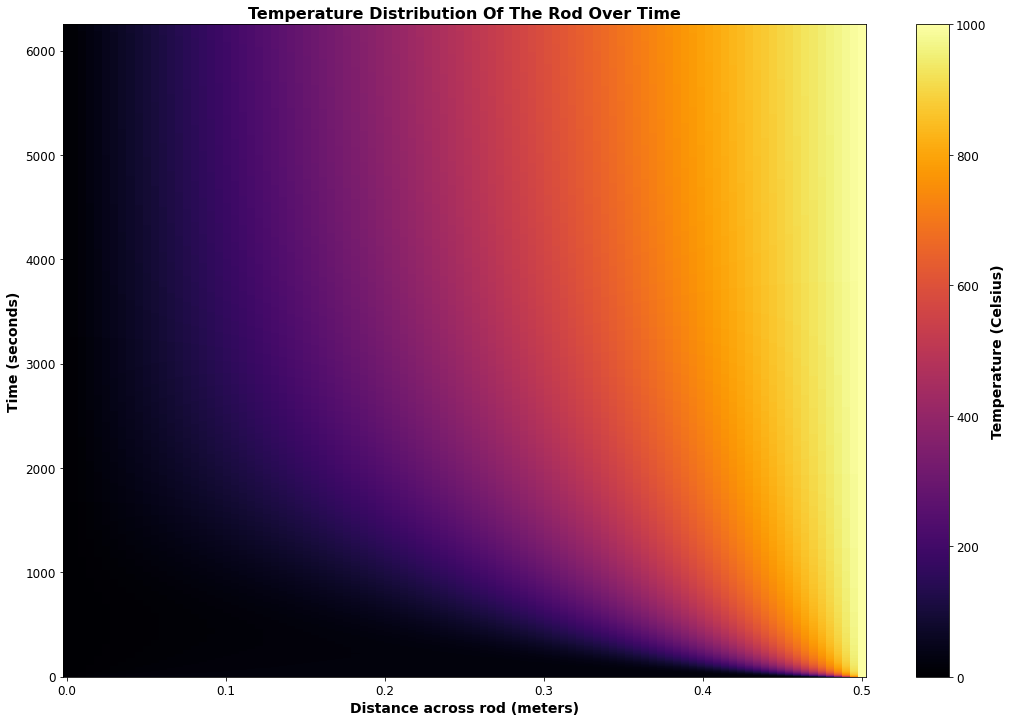

╒═══════════════════════════════════╤════════════════════╤═════════════════╤════════════════════════════╕
│  Number of spatial points on rod  │  Spatial Step (m)  │  Time Step (s)  │  Total diffusion time (s)  │
╞═══════════════════════════════════╪════════════════════╪═════════════════╪════════════════════════════╡
│                100                │     0.00505051     │       0.5       │            6250            │
╘═══════════════════════════════════╧════════════════════╧═════════════════╧════════════════════════════╛


In [8]:
# Importing NumPy library 
import numpy as np

# Importing Matplotlib.pyplot to display temperature distribution 
import matplotlib.pyplot as plt

# Importing tabulate to make a table to display key values from temperature distribution 
from tabulate import tabulate

# Given values for thermal conductivity, density and specific heat capacity 
thermal_conductivity = 59  # Units of W/m/K
density = 7900  # Units of kg/m^3
specific_heat_capacity = 450  # Units of J/kg/K   

# Thermal diffusivity value 
k = thermal_conductivity / (density * specific_heat_capacity)

# Number of spatial points on rod for part 1 
Nx = 100

# Time step value for part 1 
tau = 0.5  

# Spatial step size for part 1
h = (0.50)/ (Nx-1)  

# Alpha constant calculated for part 1 
alpha = (k * tau) / (h**2) 

# Spatial points array for the 50 cm rod for part 1 
h_array = np.arange(0,(Nx-1)*h + h, h) 

# Creating the M matrix for part 1
M_1 = M_matrix(Nx, alpha)

# Creating the boundary vector for part 1 
B_1 = boundary_vector(Nx, alpha, 0, 1000)

# Boundary conditions
d0 = 0 # Temperature (Celcius) at the rod end, x = 0 cm 
dN = 1000 # Temperature (Celcius) at the rod end, x = 50 cm

# Temperature of the rod at time = 0 
u_initial = np.ones(Nx) * 20  # Initial temperature is 20 C everywhere
u_initial[0] = d0  # Set boundary condition at x = 0
u_initial[-1] = dN  # Set boundary condition at x = 50 cm 

# Number of time steps for part 1
num_steps = 12500

# Creating a temperature list which will contain all the values of the rods temperature for each time value 
temperature_history = [u_initial.copy()]  # Storing the temperature values at time = 0 


# Creating a loop which will be used to simulate diffusion across the rod with time, adding the temperature distribution for each time value
for n in range(num_steps):
    u_i1 = temperature_solver(u_initial[1:-1], M_1, B_1)  # Calculating next time step
    u_initial = np.concatenate(([d0], u_i1, [dN]))  # Including boundary conditions to create full rod temperature array
    temperature_history.append(u_initial) # Adding the values of the just calculated temperature array to temperature history
    

# Converting the temperature history list to a 2D NumPy array for plotting
temperature_array = np.array(temperature_history)


# Plotting temperature distribution function  
def plot_temperature_over_time(temperature_array, tau, num_steps, h_array, h, Nx):
    """
    Creating a function that plots the temperature distribution of the rod for each time and spatial step.
    
    Parameters:
    -----------
    - Temperature_array: A 2d array which contains every value of temperature across the rod for each time value 
    - Tau: The time step value
    - num_steps: Number of times a temperature array was calculated for 
    - h_array: An array of the spatial distance points across the rod
    - h: Spatial step size 
    - Nx: Number of points on rod 

    Returns:
    --------
    - A heat map plot showing temperature variation over time across the rod 
    """
    # Creating an array of all time values 
    time_values = np.linspace(0, num_steps * tau, num_steps + 1)
    
    # Creating a figure with a larger size 
    fig, ax = plt.subplots(figsize=(18,12))
    
    # Creating a heat map using 'h_array' and 'time_values' as the Y and X axis respsectively, and 'temperature_array' as the color values
    c = ax.pcolor(h_array, time_values, temperature_array, cmap='inferno')
    
    # Adding a colour bar so temperature can be shown in the plot 
    colourbar = fig.colorbar(c, ax=ax, label='Temperature (Degree Celsius)')
    
    # Adding and formatting axis and temperature bar labels 
    ax.set_xlabel('Distance across rod (meters)', fontweight='bold', fontsize=14)
    ax.set_ylabel('Time (seconds)', fontweight='bold', fontsize=14)
    colourbar.set_label('Temperature (Celsius)', fontweight='bold', fontsize=14)
    
    # Increasing the size of the axis values 
    ax.tick_params(axis='both', which='major', labelsize=12) 
    
    # Increasing the size of the temperature axis values 
    colourbar.ax.tick_params(axis='y', which='major', labelsize=12)
    
    # Adding title to the plot with large and bold font
    ax.set_title('Temperature Distribution Of The Rod Over Time', fontweight='bold', fontsize=16)
    
    # Showing plot 
    plt.show()
    
    # Creating a table with values for Nx, the time step and the total diffusion time 
    table_data = [
        ["Number of spatial points on rod", "Spatial Step (m)", "Time Step (s)", "Total diffusion time (s)"],
        [Nx, h, tau, num_steps*tau]
    ]
    
    # Displaying the table of important values and formatting table
    print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid", numalign="center"))
    

# Calling plot function and plotting temperature values against distance for each time value 
plot_temperature_over_time(temperature_array, tau, num_steps, h_array, h, Nx)

# NOTE - Runtime should be around 8 seconds

In [9]:
# Defining variables for part 2 to take runtime of code and total diffusion time into consideration 
Nx2 = 80
tau2 = 1.5 
num_steps2 = 15000
h2 = (0.5)/ (Nx2-1)  
h_array2 = np.arange(0,(Nx2 - 1)*h2 + h2, h2) 
alpha2 = (k * tau2) / h2**2

# Creating new M matrix for part 2
M_2 = M_matrix(Nx2, alpha2)

# Editing the final value of the matrix so to make no heat loss 
M_2[Nx2 - 3,Nx2 - 3] = 1 + alpha2 

# Creating a new boundary vector with at x = 0, temperature = 1000 C
B_2 = boundary_vector(Nx2, alpha2, 1000, 0)

# NOTE - The temperature of the rod at x = 0 is now at 1000 C, due to how the M matrix was constructed 

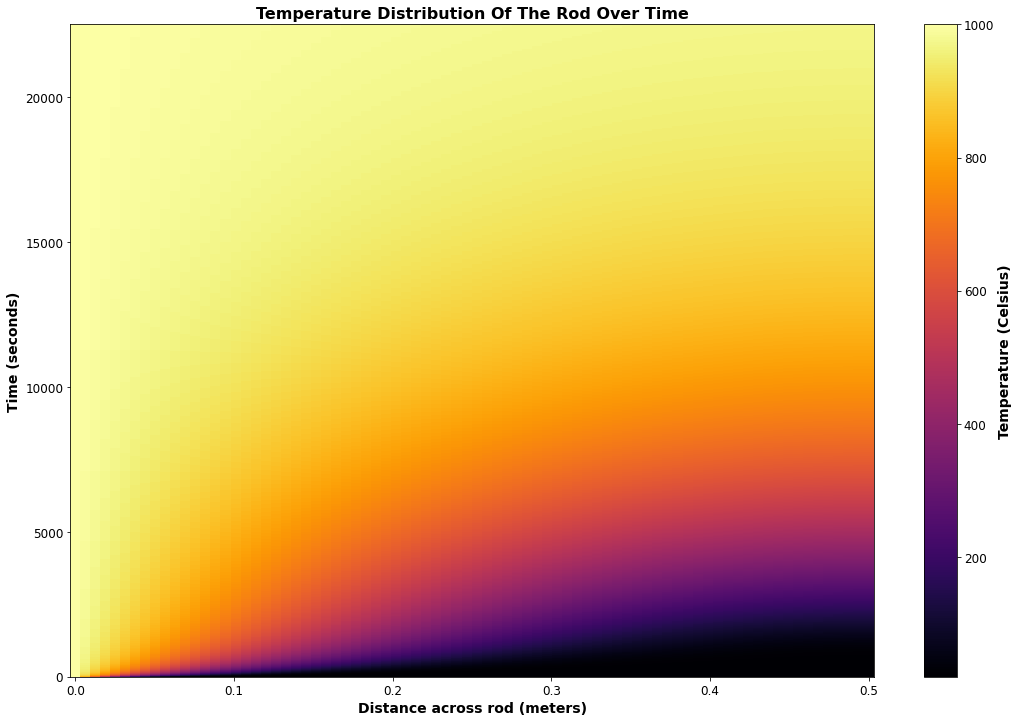

╒═══════════════════════════════════╤════════════════════╤═════════════════╤════════════════════════════╕
│  Number of spatial points on rod  │  Spatial Step (m)  │  Time Step (s)  │  Total diffusion time (s)  │
╞═══════════════════════════════════╪════════════════════╪═════════════════╪════════════════════════════╡
│                80                 │     0.00632911     │       1.5       │           22500            │
╘═══════════════════════════════════╧════════════════════╧═════════════════╧════════════════════════════╛


In [10]:
# Temperature conditions for the rod at time = 0 
u_initial2 = np.ones(Nx2) * 20  # Initial temperature is 20 C everywhere
u_initial2[0] = dN  # Setting boundary condition at x = 0, where temperature is 1000 C

# Creating a temperature list which will store all temperature values for each individual time
temperature_history2 = [u_initial2.copy()] # Temperature values stored in list at time = 0

# Creating a loop which simulates diffusion across the rod with time, adding the temperature distribution for each time value 
for n in range(num_steps2):
    u_i2 = temperature_solver(u_initial2[1:-1], M_2, B_2)  # Calculating next time step
    u_initial2 = np.concatenate(([dN], u_i2, [u_i2[-1]]))  # Including boundary conditions. At x = 0, temperature = 1000. At x = 50 cm, temperature = same temperature as the final temperature of the array.  
    temperature_history2.append(u_initial2) # Adding new temperature values for a given time value into a temperature list 
    # NOTE - dN was previously defined above as 1000 C
    
# Making the temperature list an array so it is easier to plot 
temperature_array2 = np.array(temperature_history2) 

# Calling plot function and plotting temperature values against distance for each time value 
plot_temperature_over_time(temperature_array2, tau2, num_steps2, h_array2, h2, Nx2)

# NOTE - Runtime should be around 7 seconds 

In this code, 1D heat diffusion was simulated for a 50 cm rod where numerical solutions were found for the 1D diffusion equation. An unconditionally stable implicit method was used for the problem which also accommodated both Dirichlet and Neumann boundary conditions. This ensured accuracy even with small rod length increments and large time steps. A matrix equation was used to find the temperature distribution over time across the whole rod. In part 1, the boundary conditions had a constant 1000 C applied at one end and 0 C applied at the other end, where the rest of rod started initially at 20 C. For the second part only a constant 1000 C was applied to one end of the rod. For both parts boundary conditions were applied via a vector in the matrix equation.

The solution to the matrix equation utilised NumPy's ‘linalg.solve’ function. This was chosen as it is a highly optimised matrix solver which is faster and much more numerically stable than other matrix solving functions. While alternative options such as ‘SciPy.linalg.solve’ were considered, even when exploiting matrix symmetry and bypassing result validation checks in the SciPy function, it exhibited longer runtime compared to NumPy's equivalent. NumPy also played a crucial role in creating and manipulating arrays throughout the code. For graphical representation of temperature data, Matplotlib was used. Moreover, Tabulate facilitated presenting results in a tabular format. A dedicated function was made for plotting, as both parts needed the same plots. The 'inferno' colormap was selected because it offers a perceptually uniform sequential color change that made it easy to distinguish subtle variations in temperature. 

The results for part 1 initially showed the rod's temperature rose near the 1000 C end and fell near the 0 C end, while the rest remained steady. After 1000 seconds, the entire rod began to change temperature. The temperature distribution converged to a linear relationship spanning from 0 C to 1000 C at around 4000 seconds, demonstrating the diffusion process's characteristic behavior. In part 2, initially only the rod end at 1000 C showed a noticeable temperature increase. Around 1000 seconds later, more of the rod began to heat significantly. By approximately 22500 seconds, the rod's temperature was approaching uniformity with all of the rod approaching 1000 C. 

Careful consideration was given to the values of Nx (number of spatial points) to strike a balance between result quality and computational cost. The value of Nx significantly impacted runtime due to its direct link to matrix sizes. By testing the code with a smaller number of Nx, it showed that diffusion was accurate still. However, the diffusion only looked accurate in the middle of the rod. Also the value of tau chosen was essential as if it was too large then the diffusion could not be seen and if it was too little then no diffusion could be seen at all. The number of iterations to find temperature at different times also directly impacted the runtime of the code, so a balance again was needed. 

Overall the code simulated 1D diffusion with good accurate results and was very efficient.

